# Geospatial demand estimation

**Original code:** [Alexandros Korkovelos](https://github.com/akorkovelos) <br />
**Support:** [Ariane Millot](https://github.com/ariane-millot), [Martin J. Stringer]()<br />
**Funding:** Imperial College <br />

---------------------------


#### Brief overview

This notebook performs three main analytical processes:

- **Part 1**: Generated grid mesh (H3 hexagons) for the area of interest (given input admin boundary)
- **Part 2**: Extract GIS-based attributes (vecror or raster) to the grid
- **Part 3**: Build blocks estimating demand for the different energy vectors

A slightly more detailed description of the processing bits is presented before each part below. <br />


In [99]:
# Decide if you want to run a region or the country
area = "COUNTRY"
# area = "Copperbelt" # Regions = Central, Copperbelt, Eastern

### Import necessary modules

In [100]:
### Activate geospatial_env first

# Numeric
import numpy as np
import pandas as pd
import math

# System
import os
import shutil
from IPython.display import display, Markdown, HTML, FileLink, FileLinks

# Spatial
import geopandas as gpd
import json
import pyproj
from shapely.geometry import Point, Polygon, MultiPoint
from shapely.wkt import dumps, loads
from shapely.ops import nearest_points
from pyproj import CRS
import ogr, gdal, osr
#import fiona


# Mapping / Plotting
from functools import reduce
#import datapane as dp 
#!datapane login --token="9bde41bfbc4ad14119e32086f9f06d2e5db1d5b8"
import folium
from folium.features import GeoJsonTooltip
from folium.plugins import BeautifyIcon
from folium.plugins import HeatMap
import branca.colormap as cm
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
%matplotlib inline

%matplotlib inline

In [101]:
#import geopandas as gpd   # Note that you require geopandas version >= 0.7 that incluse clip see here for installation (https://gis.stackexchange.com/questions/360127/geopandas-0-6-1-installed-instead-of-0-7-0-in-conda-windows-10#)
import os
import fiona
import ipywidgets as widgets
from IPython.display import display
from rasterstats import zonal_stats
import rasterio
from geojson import Feature, Point, FeatureCollection
import rasterio.fill
from shapely.geometry import shape, mapping
import json
#from earthpy import clip    clip has been deprecated to geopandas
#import earthpy.spatial as es
import numpy as np
import tkinter as tk
from tkinter import filedialog, messagebox
import gdal
import datetime
import warnings
import pandas as pd
import scipy.spatial
warnings.filterwarnings('ignore')

#import contextily as ctx
import h3 as h3
from shapely.ops import unary_union
from shapely.geometry.polygon import Polygon

root = tk.Tk()
root.withdraw()
root.attributes("-topmost", True)

pd.options.display.float_format = '{:,.4f}'.format

In [102]:
from utils import processing_raster, finalizing_rasters, spatialjoinvectors

### Define directories and dataset names

In [103]:
### Define directories and dataset names
ROOT_DIR = os.path.abspath(os.curdir)
in_path = ROOT_DIR
out_path = ROOT_DIR + "/Outputs"

In [104]:
## Coordinate and projection systems
crs_WGS84 = CRS("EPSG:4326")    # Originan WGS84 coordinate system
crs_proj = CRS("EPSG:32736")    # Projection system for the selected country -- see http://epsg.io/ for more info

# Part 1. Create base grid with H3

COUNTRY


hexagons                                           geometry     lon  \
0  8755ab9a9ffffff  POLYGON ((20.94797 -16.44730, 20.93785 -16.456... 20.9358   
1  87551e66cffffff  POLYGON ((21.91535 -14.13700, 21.90537 -14.146... 21.9031   
2  8734652c6ffffff  POLYGON ((31.93291 -14.91164, 31.92261 -14.922... 31.9199   
3  875530128ffffff  POLYGON ((26.94146 -12.91222, 26.93140 -12.922... 26.9287   
4  875513a16ffffff  POLYGON ((23.09701 -14.62583, 23.08692 -14.635... 23.0846   

       lat  
0 -16.4426  
1 -14.1327  
2 -14.9066  
3 -12.9078  
4 -14.6214

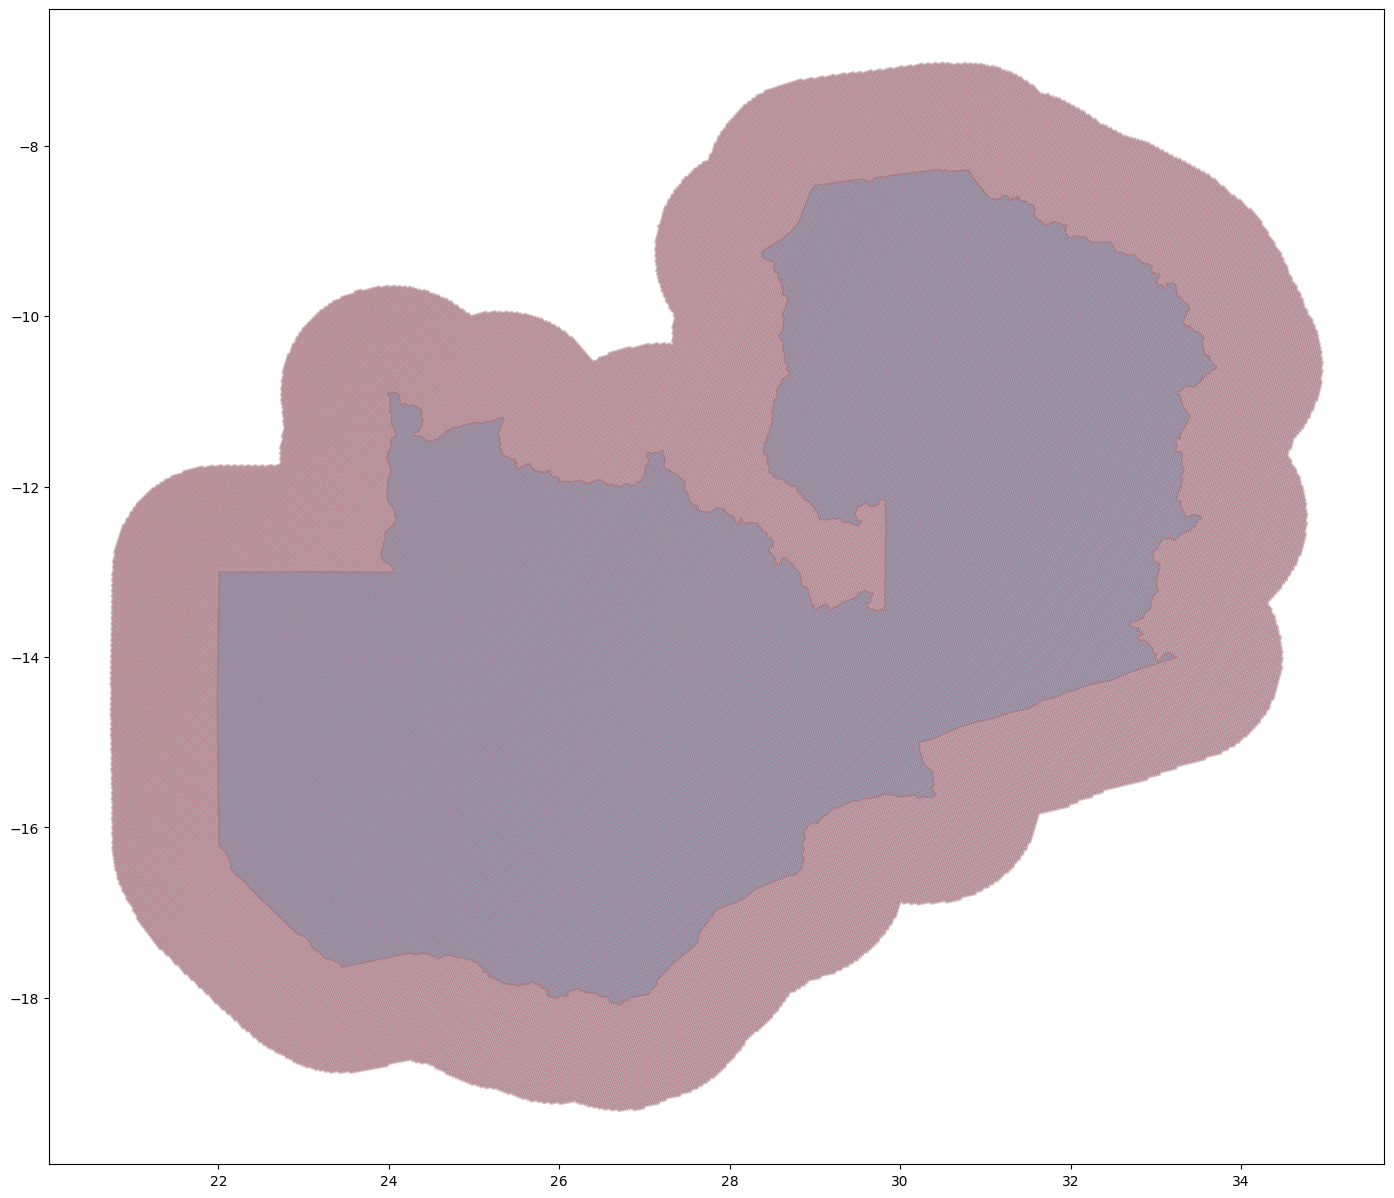

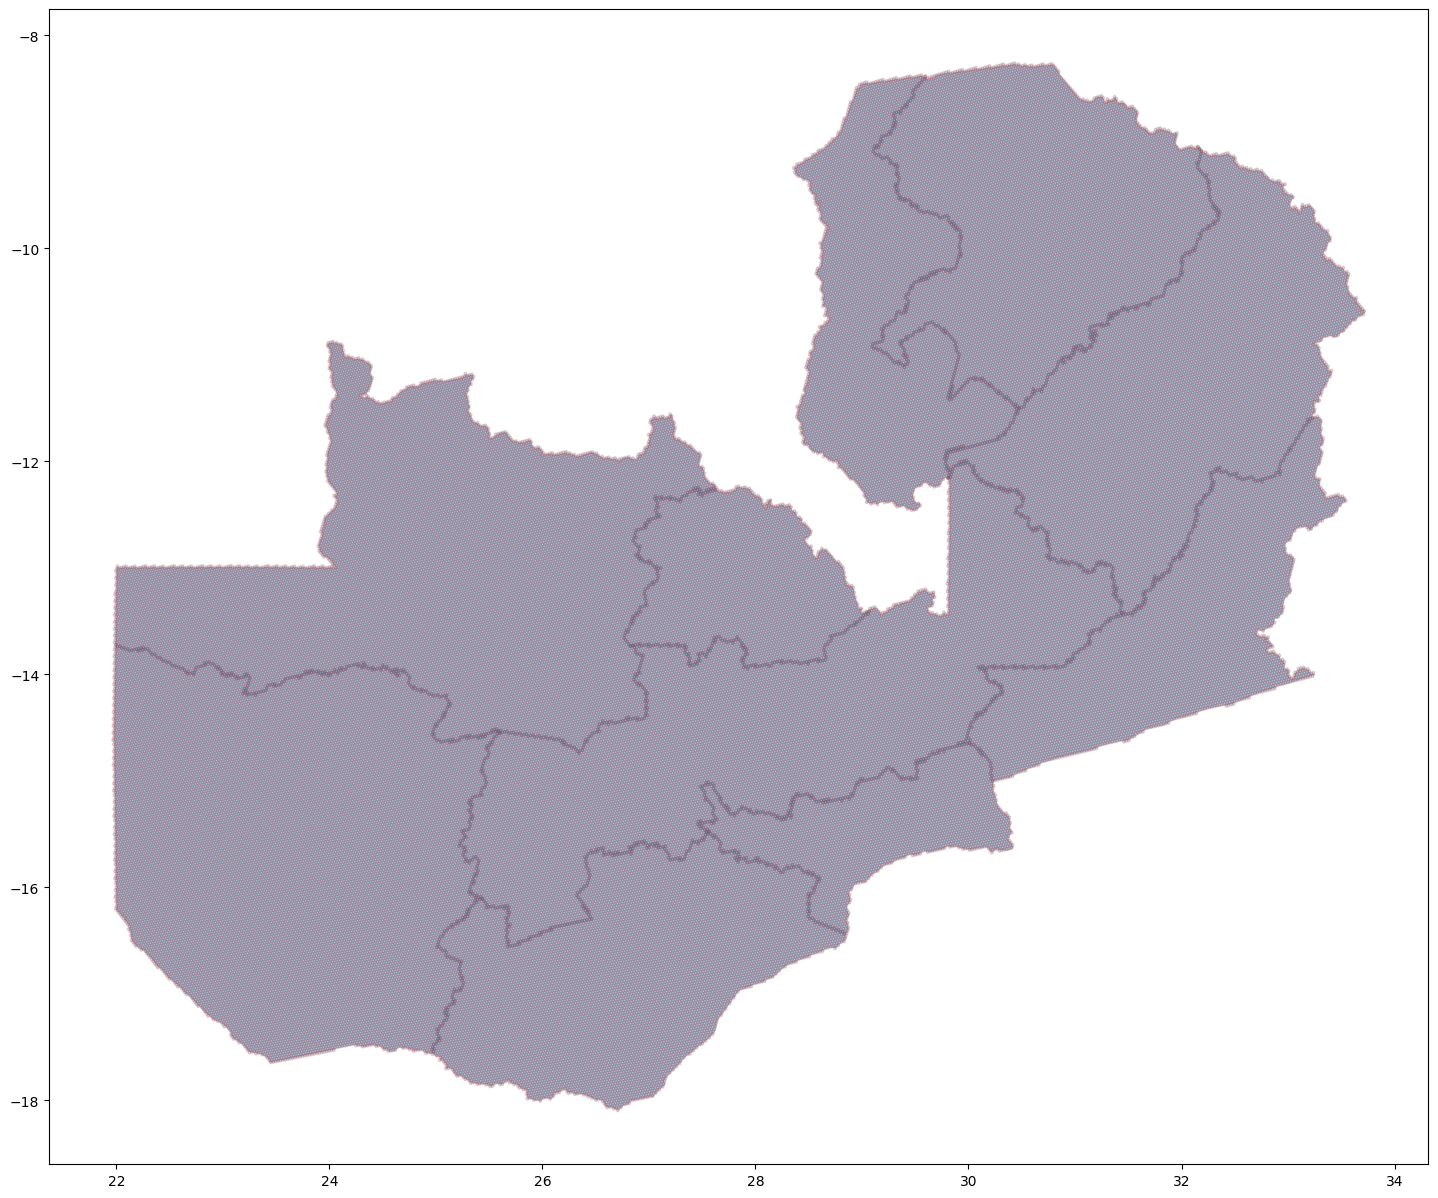

In [105]:
%run BaseGrid.ipynb

# Part 2. Extract GIS-based attributes

## Extract raster values to hexagons

##### Once done with rasters run this cell

In [106]:
# grid = finalizing_rasters(out_path, grid, crs_proj)

Final dataframe

In [107]:
# grid.drop(['index_right'], axis=1, inplace=True)
# grid.head(4)

## Extract information from vector layers

# Part 3. Constructing Multi-vector Demand

### Calculate Total Demand

**Demand = Residential + Commercial + Industrial **

where, 

**Residential** = No of HH with access X average en. cons. kWh/HH/year X wealth adjustment factor

**Commercial**  = (No of buildings X 20 kWh/bld/year) if more than 100 buildings else (No of buildings X 100 kWh/bld/year)

**Industrial**  = Commodity Production (tonnes) from mines X average energy consumption per tonne

2024-01-08 13:08:52.600572
2024-01-08 13:17:25.081140
2024-01-08 15:53:11.474805
2024-01-08 16:01:57.099911


IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



2024-01-08 16:02:56.480010
-1.2319999933242798
1.496250033378601


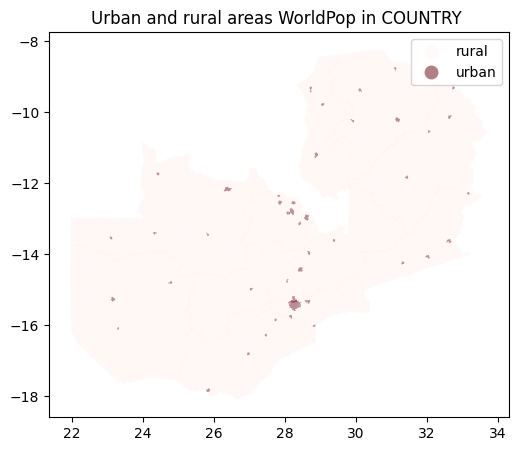

Number of res HH in urban and rural areas in COUNTRY 1562390.0 2104898.0
total Buildings: 9,962,105 urban: 2,426,994 rural: 7,535,111
share Build urban: 24% rural: 76%
total Res Buildings: 8,748,608 urban: 1,213,497 rural: 7,535,111
nb Of HH per Res Building: urban 1.3 rural 0.3
total Res HH: urban 1,562,390 rural 2,104,898
nb Of HH per Res Building average 0.4
totalResHHWithAccessUrb: 1,558,970
totalResHHWithAccessRur: 745,296
totalResHHWithAccess: 2,304,266
HH access rate : 63%
HH access rate urban: 100%
HH access rate rural: 35%


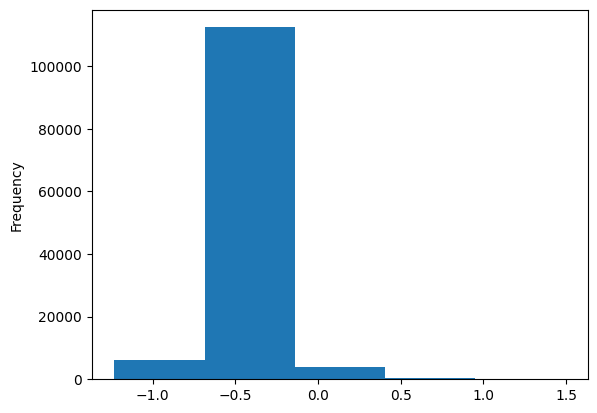

[(-1.2319999933242798, 5), (-0.6863499879837036, 73), (-0.14069998264312744, 365), (0.40495002269744873, 1250), (0.9506000280380249, 3012)]
residential electricity consumption: 2,753 GWh
4022.5
2752.7186230632137
146%
Residential electricity consumption assessed: 4,022.5 GWh
residential electricity consumption: 4,022 GWh


In [108]:
%run Residential/BuildingDemandMethod1_Simplified.ipynb
total_residentialenergy_assessed = grid["REnS_kWh"].sum()
print("residential electricity consumption:", f"{total_residentialenergy_assessed/10**6:,.0f}","GWh") # GWh

In [109]:
# grid["Commercial"] = grid.apply(lambda row: (row['buildingscount']*50 if ((row['buildingscount'] > 100))
                                             # else row['buildingscount']*100), axis=1)
# total_servicesenergy_assessed = grid["Commercial"].sum()
# print("services electricity consumption:", f"{total_servicesenergy_assessed/10**6:,.0f}","GWh") # GWh

In [110]:
%run Industry/IndustryDemand.ipynb
print("Industry electricity consumption in",f"{area}",f"{total_industryenergy/3600:,.1f}", "TWh")

total statistical nonFerrousMetals electricity consumption: 22,897.0 TJ or  6.4 TWh
total statistical mining electricity consumption: 818.0 TJ or  0.2 TWh
total statistical nonFerrousMetals and mining electricity consumption: 23,715.0 TJ or  6.6 TWh
total calculated energy consumption: 23,565.7 TJ or  6.5 TWh
Coverage energy in total statistical nonFerrousMetals and mining electricity consumption: 99 %
Industry electricity consumption in COUNTRY : 6.6 TWh
Industry electricity consumption in COUNTRY 6.6 TWh


In [111]:
#Concatenate results
gridRes = gpd.read_file(out_path + "\\" + "res_energy_map.shp")
# gridRes = gridRes.to_crs(crs_proj)
gridInd = gpd.read_file(out_path + "\\" + "ind_energy_map.shp")
# gridInd = gridInd.to_crs(crs_proj)
# init
grid = gridRes.copy()
grid = grid.merge(gridInd, on='id', suffixes=('', '_y'))
# grid = gpd.GeoDataFrame(grid,crs=crs_proj, geometry=grid.geometry)
grid.drop(grid.filter(regex='_y$').columns, axis=1, inplace=True)
# grid = gpd.pd.concat([gridRes, gridInd])
grid.head(4)

hexagons     lon      lat  index_righ         NAME_1  id  \
0  875530128ffffff 26.9287 -12.9078      1.0000     Copperbelt   1   
1  875530128ffffff 26.9287 -12.9078      6.0000  North-Western   2   
2  875513a16ffffff 23.0846 -14.6214      9.0000        Western   3   
3  87551001dffffff 24.1247 -14.7582      9.0000        Western   4   

   buildingss  locationWP   HREA     rwi  ... ResHHNbWit ResHHNbW_1  \
0     10.0000      0.0000 0.2959 -0.2485  ...     0.0000     2.7935   
1     10.0000      0.0000 0.2959 -0.2485  ...     0.0000     2.7935   
2      5.0000      0.0000 0.2730 -0.7123  ...     0.0000     1.3967   
3    109.0000      0.0000 0.0051 -0.5290  ...     0.0000     0.0000   

  ResHHNbW_2  ResEnergyC  ResEnerg_1  ResEnergy_  REnS_kWh  \
0     2.7935          73          73     60.3344   88.1657   
1     2.7935          73          73     60.3344   88.1657   
2     1.3967           5           5      1.9065    2.7859   
3     0.0000          73          73      0.0000    0.0000   

                                            geometry  Energy Ele  IndEne_TJ  
0  POLYGON ((26.94146 -12.91222, 26.93140 -12.922...         NaN        NaN  
1  POLYGON ((26.94146 -12.91222, 26.93140 -12.922...         NaN        NaN  
2  POLYGON ((23.09701 -14.62583, 23.08692 -14.635...         NaN        NaN  
3  POLYGON ((24.13716 -14.76271, 24.12701 -14.772...         NaN        NaN  

[4 rows x 25 columns]

In [112]:
#Unit
grid["IndEnergy_GWh"]=grid["IndEne_TJ"]/3600 *10**3
total_ind = grid["IndEnergy_GWh"].sum()
print(total_ind)
grid['REnS_GWh'] = grid['REnS_kWh']/10**6
total_res = grid["REnS_GWh"].sum()
print(total_res)
grid['SEn_GWh'] = grid['SEn_kWh']/10**6
total_ser = grid["SEn_GWh"].sum()
print(total_ser)

6587.5
4022.5


In [127]:
grid["TotalDem"] = grid.apply(lambda row: (np.nansum([row['REnS_GWh'], 
                                          row['SEn_GWh'],  
                                             row["IndEnergy_GWh"]
                                                     ])), axis=1) #sum in GWh

In [128]:
total = grid["TotalDem"].sum()
print("total electricity consumption:", f"{total:,.0f}","GWh") # GWh

total electricity consumption: 6,588 GWh


In [129]:
grid.head(3)

hexagons     lon      lat  index_righ         NAME_1  id  \
0  875530128ffffff 26.9287 -12.9078      1.0000     Copperbelt   1   
1  875530128ffffff 26.9287 -12.9078      6.0000  North-Western   2   
2  875513a16ffffff 23.0846 -14.6214      9.0000        Western   3   

   buildingss  locationWP   HREA     rwi  ... ResEnergyC ResEnerg_1  \
0     10.0000      0.0000 0.2959 -0.2485  ...         73         73   
1     10.0000      0.0000 0.2959 -0.2485  ...         73         73   
2      5.0000      0.0000 0.2730 -0.7123  ...          5          5   

  ResEnergy_  REnS_kWh                                           geometry  \
0    60.3344   88.1657  POLYGON ((26.94146 -12.91222, 26.93140 -12.922...   
1    60.3344   88.1657  POLYGON ((26.94146 -12.91222, 26.93140 -12.922...   
2     1.9065    2.7859  POLYGON ((23.09701 -14.62583, 23.08692 -14.635...   

   Energy Ele  IndEne_TJ  IndEnergy_GWh  REnS_GWh  TotalDem  
0         NaN        NaN            NaN    0.0001    0.0000  
1         NaN        NaN            NaN    0.0001    0.0000  
2         NaN        NaN            NaN    0.0000    0.0000  

[3 rows x 28 columns]

### Export result

In [130]:
crs_WGS84 = CRS("EPSG:4326")    # Originan WGS84 coordinate system
grid = grid.to_crs({ 'init': crs_WGS84}) 

In [131]:
with fiona.Env(OSR_WKT_FORMAT="WKT2_2018"):
    grid.to_file(out_path + "\\" + 'total_demand_grid.gpkg', driver="GPKG", index=False, engine='fiona')
#grid.to_file(out_path + "\\" + 'total_demand_grid.geojson', driver="GeoJSON")

## Print maps for quick assessment

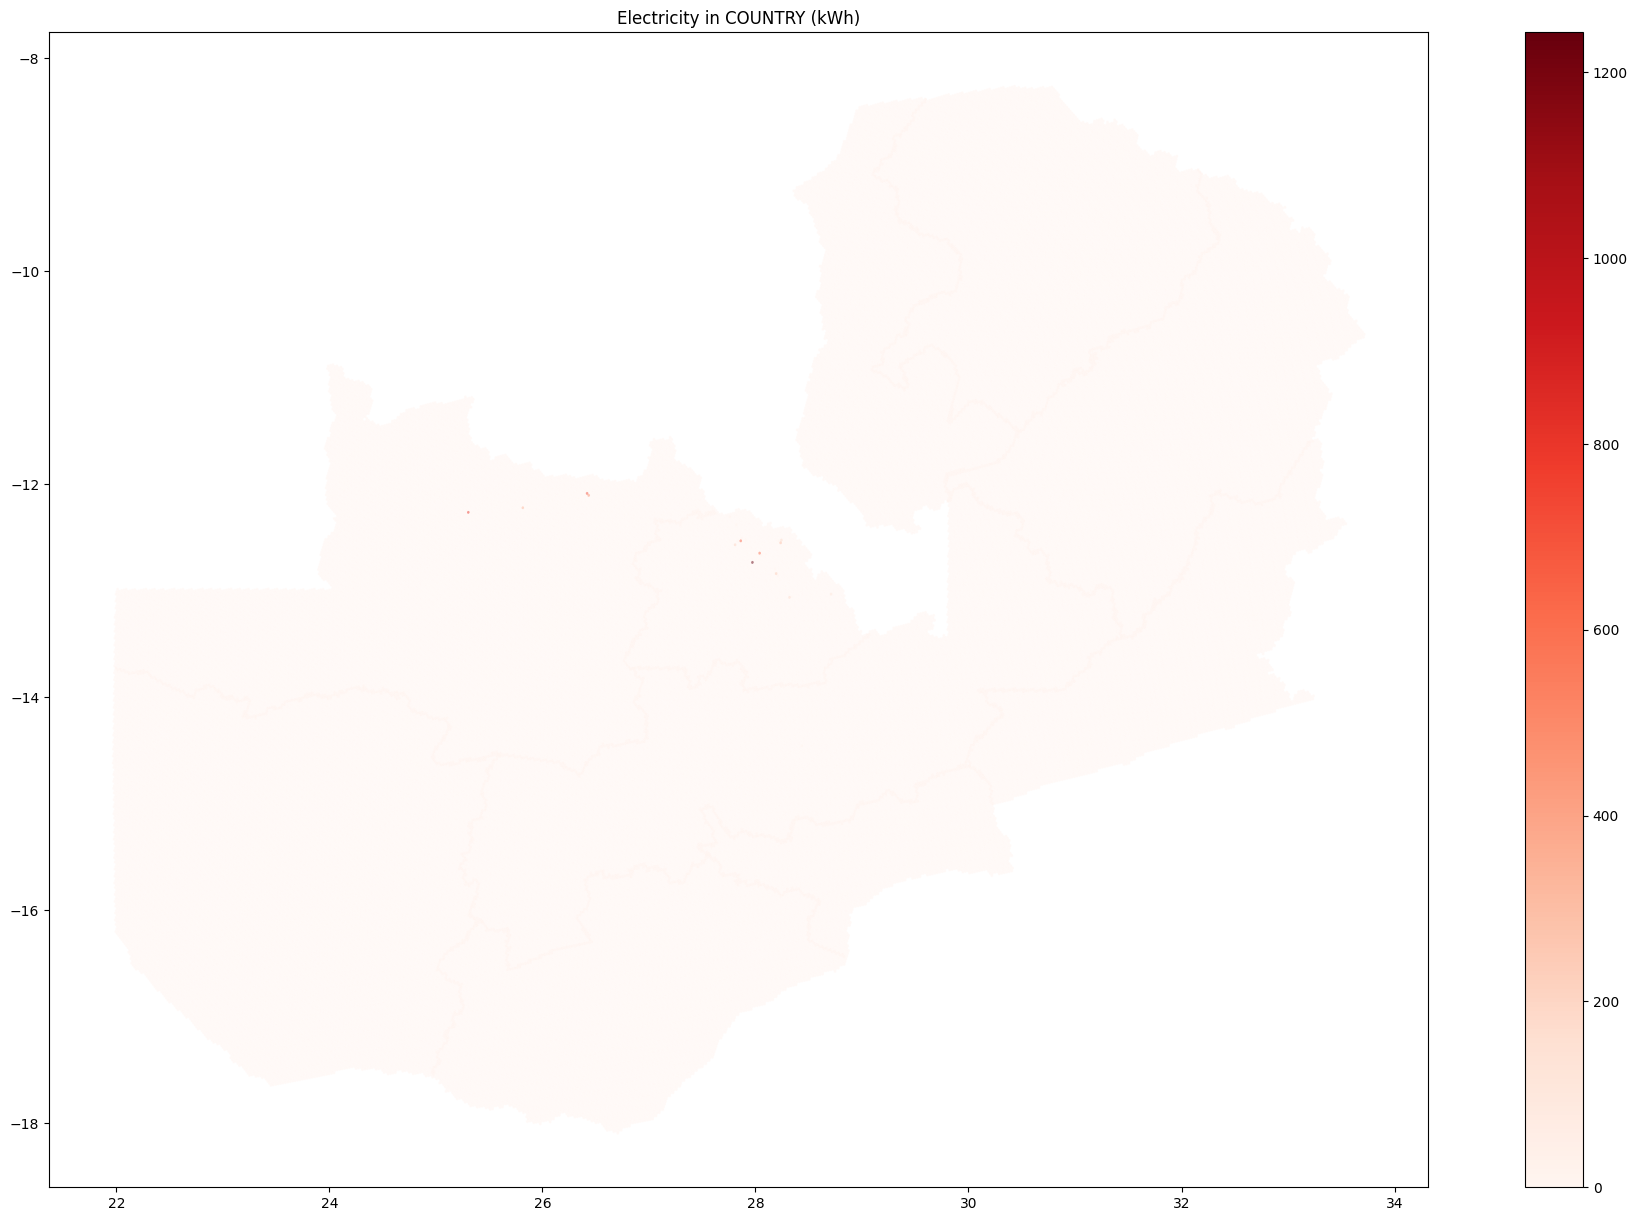

In [132]:
# Plotting for testinf
# Create the axis first
fig, ax = plt.subplots(figsize=(25, 15))

# Plot all crops
grid.sort_values('TotalDem', ascending=True).plot(
    ax=ax, column='TotalDem', cmap="Reds", legend=True, alpha=0.5)

ax.set_aspect('equal', 'box')
txt = ax.set_title('Electricity in {} (kWh)'.format(area) )

# Save plot as figure 
plt.savefig('sample_priority_map.png', bbox_inches='tight')